In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 支持显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
data = pd.read_csv('test.csv')

In [4]:
data.head()

,movl,leal,addl,popl,leave,movzbl,testb,je,xorl,cmpl,...,3,9,version,L90,L87,L91,jns,L52,L58,L95
0,704,126,66,40,9,12,30,28,4,33,...,657,477,6,0,0,0,0,0,0,0
1,704,126,66,40,9,12,30,28,4,33,...,657,477,6,0,0,0,0,0,0,0
2,704,126,66,40,9,12,30,28,4,33,...,658,477,6,0,0,0,0,0,0,0
3,704,126,66,40,9,12,30,28,4,33,...,657,477,7,0,0,0,0,0,0,0
4,704,126,66,40,9,12,30,28,4,33,...,657,477,7,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movl     17 non-null     int64
 1   leal     17 non-null     int64
 2   addl     17 non-null     int64
 3   popl     17 non-null     int64
 4   leave    17 non-null     int64
 5   movzbl   17 non-null     int64
 6   testb    17 non-null     int64
 7   je       17 non-null     int64
 8   xorl     17 non-null     int64
 9   cmpl     17 non-null     int64
 10  jle      17 non-null     int64
 11  jg       17 non-null     int64
 12  testl    17 non-null     int64
 13  text     17 non-null     int64
 14  js       17 non-null     int64
 15  L92      17 non-null     int64
 16  jne      17 non-null     int64
 17  L56      17 non-null     int64
 18  L63      17 non-null     int64
 19  jl       17 non-null     int64
 20  jge      17 non-null     int64
 21  L89      17 non-null     int64
 22  L93      17 non-null     int

In [6]:
dsc = data.describe()
dsc

,movl,leal,addl,popl,leave,movzbl,testb,je,xorl,cmpl,...,3,9,version,L90,L87,L91,jns,L52,L58,L95
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,696.529412,126.823529,64.352941,38.352941,9.823529,16.764706,25.235294,23.235294,1.882353,35.647059,...,654.764706,477.529412,8.941176,0.529412,0.529412,0.529412,0.588235,0.294118,0.294118,0.294118
std,7.771081,1.424574,2.262222,2.029199,1.014599,4.630462,4.630462,4.630462,2.057983,2.572479,...,2.727852,5.756710,2.304088,0.514496,0.514496,0.514496,0.939336,0.469668,0.469668,0.469668
min,686.000000,126.000000,60.000000,36.000000,9.000000,12.000000,21.000000,19.000000,0.000000,33.000000,...,651.000000,470.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,688.000000,126.000000,62.000000,36.000000,9.000000,12.000000,21.000000,19.000000,0.000000,33.000000,...,652.000000,472.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,695.000000,126.000000,66.000000,40.000000,9.000000,21.000000,21.000000,19.000000,0.000000,38.000000,...,655.000000,477.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,704.000000,128.000000,66.000000,40.000000,11.000000,21.000000,30.000000,28.000000,4.000000,38.000000,...,657.000000,477.000000,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,704.000000,130.000000,66.000000,40.000000,11.000000,21.000000,30.000000,28.000000,4.000000,38.000000,...,658.000000,487.000000,13.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


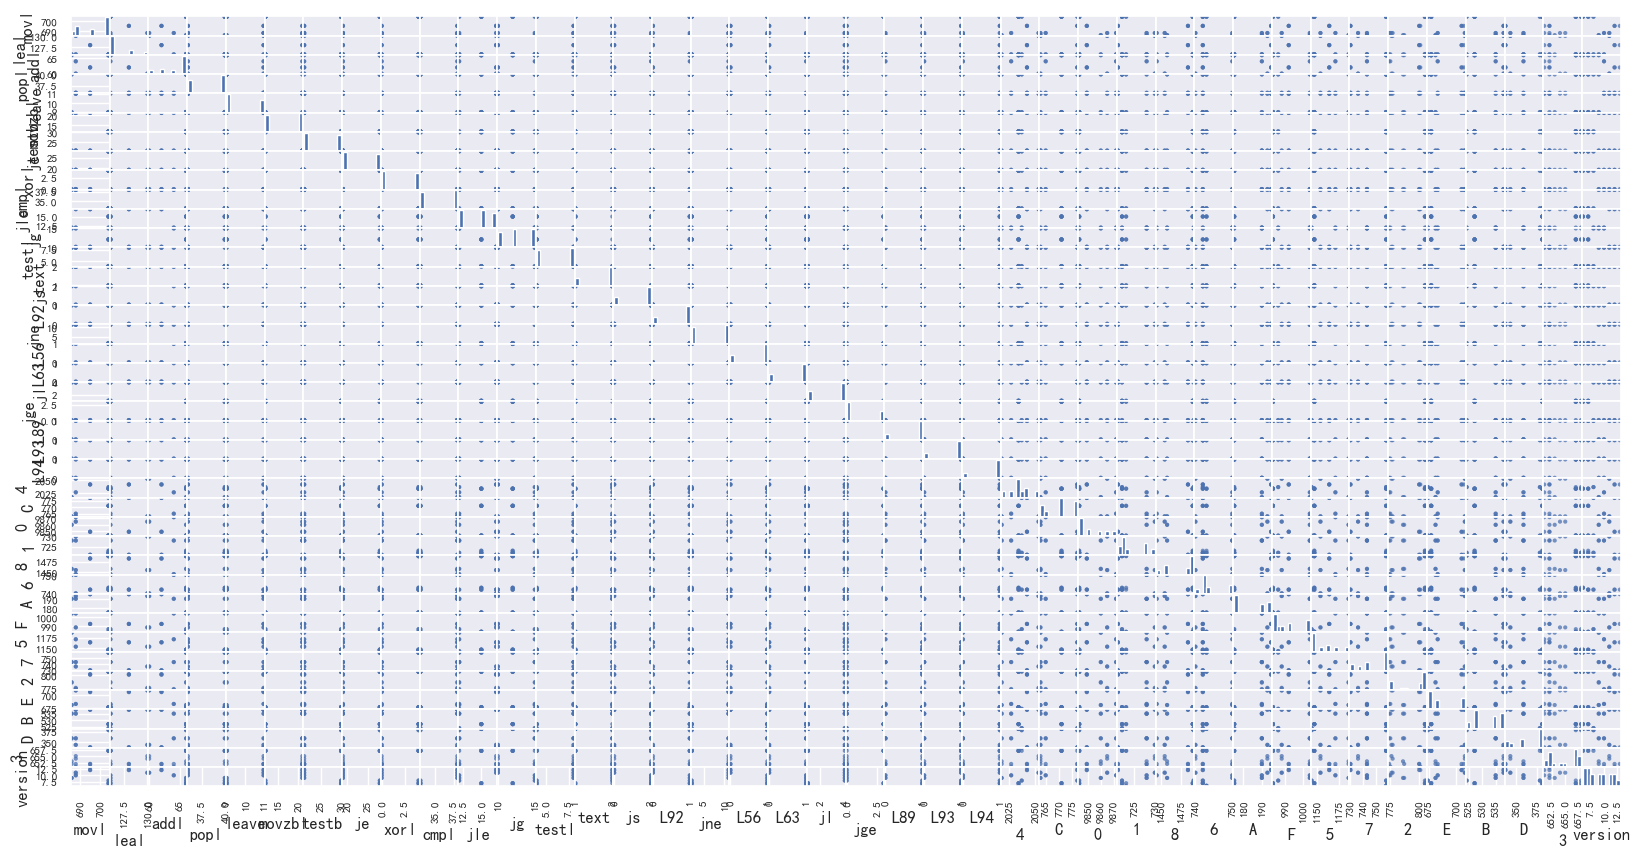

In [27]:
pd.plotting.scatter_matrix(data, figsize=(20,10), alpha=0.75)
plt.show()

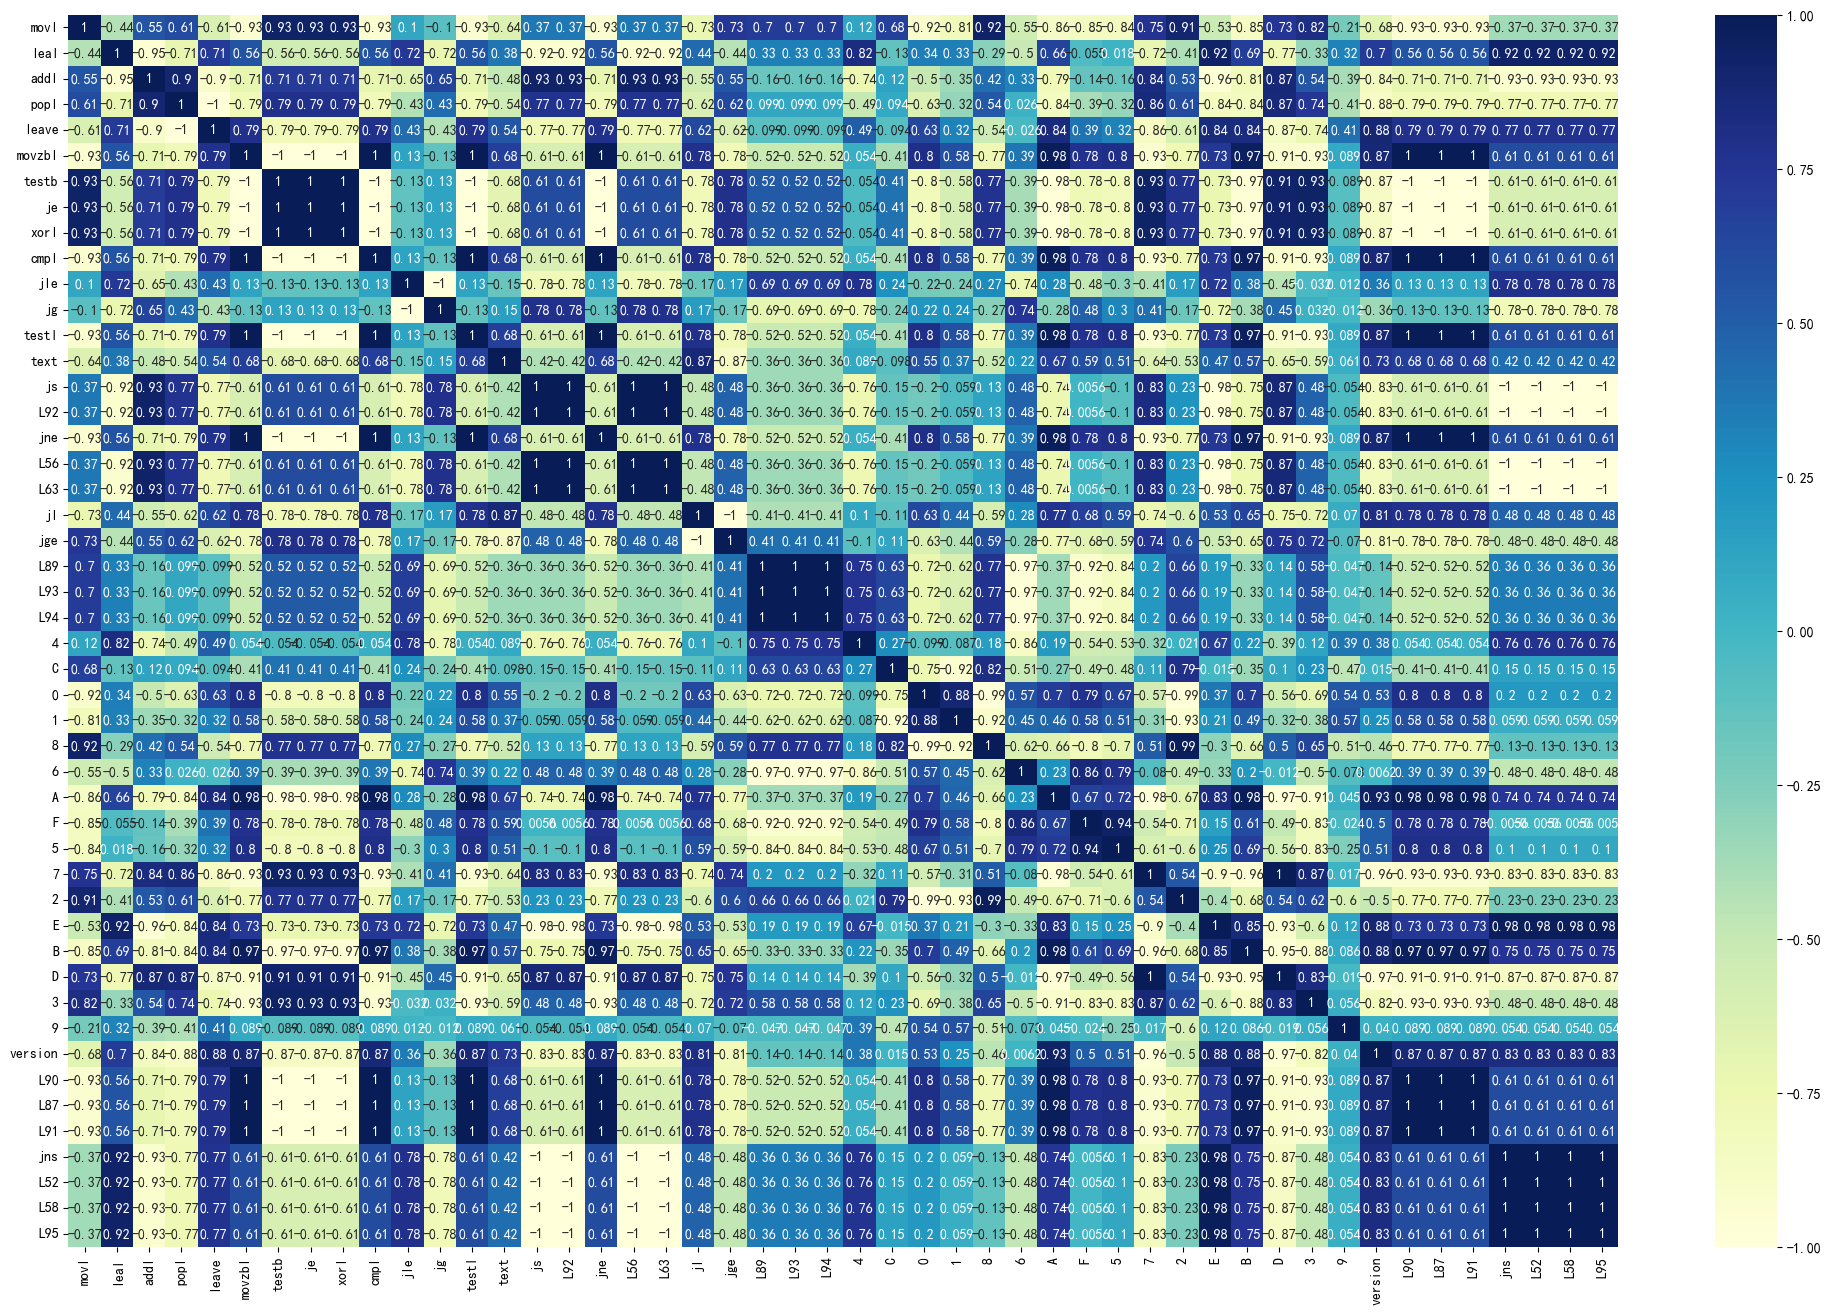

In [11]:
plt.figure(figsize=(25,16))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [14]:
# 筛选出于因变量之间的相关性
cor_target = abs(cor["version"])
# 挑选于大于0.5的相关性系数
relevant_features = cor_target[cor_target>0.5]
relevant_features,len(relevant_features)

(movl       0.675327
 leal       0.701167
 addl       0.835119
 popl       0.877549
 leave      0.877549
 movzbl     0.871478
 testb      0.871478
 je         0.871478
 xorl       0.871478
 cmpl       0.871478
 testl      0.871478
 text       0.733828
 js         0.825557
 L92        0.825557
 jne        0.871478
 L56        0.825557
 L63        0.825557
 jl         0.806573
 jge        0.806573
 0          0.529654
 A          0.930555
 5          0.507108
 7          0.957619
 2          0.504099
 E          0.875346
 B          0.883294
 D          0.966505
 3          0.817746
 version    1.000000
 L90        0.871478
 L87        0.871478
 L91        0.871478
 jns        0.825557
 L52        0.825557
 L58        0.825557
 L95        0.825557
 Name: version, dtype: float64,
 36)

In [10]:
import seaborn as sns
sns.set(font='SimHei')  # 支持中文显示

<AxesSubplot:>

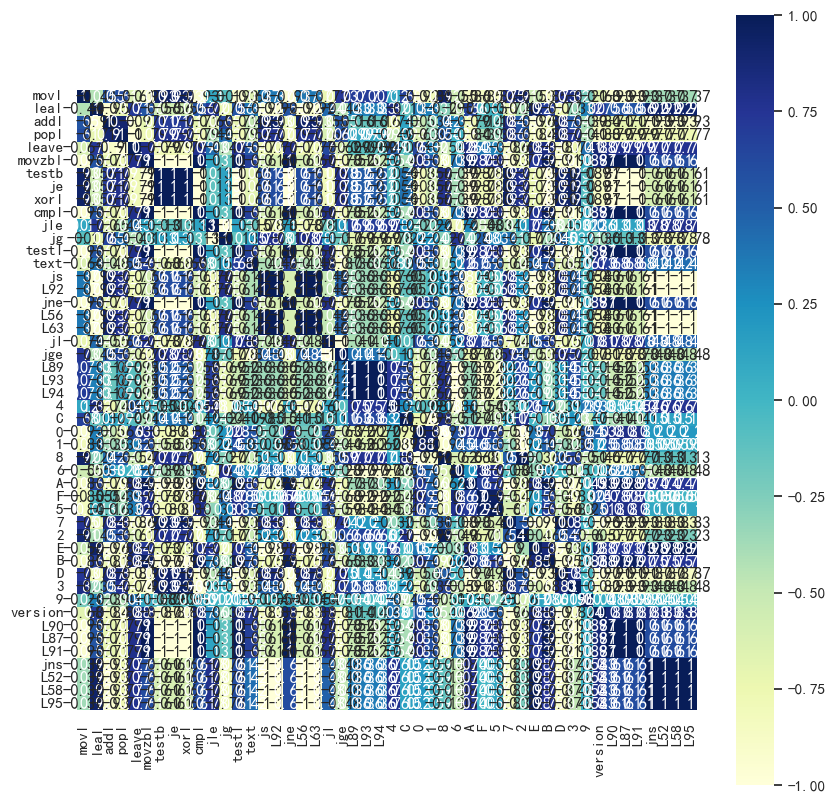

In [11]:
fig, ax = plt.subplots(figsize = (10,10))

# cor：相关系数矩阵
# cmap：颜色
# xticklabels：显示x轴标签
# yticklabels：显示y轴标签
# annot：方块中显示数据
# square：方块为正方形

sns.heatmap(cor, cmap='YlGnBu', xticklabels=True, yticklabels=True,
            annot=True, square=True)


In [12]:
from scipy import stats
np.set_printoptions(suppress=True)  # 不使用用科学计数法
pd.set_option('display.float_format',lambda x : '%.4f' % x)  # 保留小数点后4位有效数字


In [13]:
# 0.975分位数
tp = stats.t.isf(1-0.975, 28)


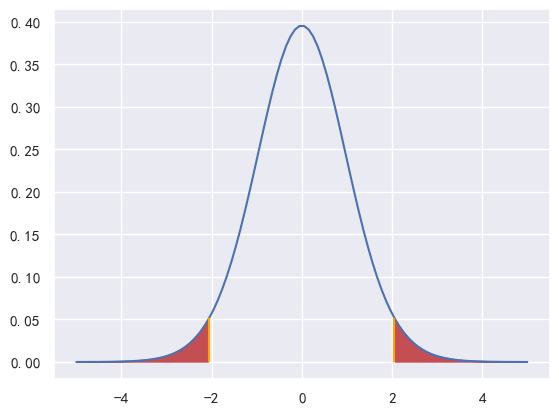

In [14]:
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, 28)
plt.plot(x,y)
plt.vlines(-tp, 0, stats.t.pdf(-tp, 28), colors='orange')
plt.vlines(tp, 0, stats.t.pdf(tp, 28), colors='orange')
plt.fill_between(x, 0, y, where=abs(x)>tp, interpolate=True, color='r')


In [15]:
# 自定义求解p值矩阵的函数
def my_pvalue_pearson(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.pearsonr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_pearson.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_pearson.csv', index_col=0)
    return p_val


In [16]:
my_pvalue_pearson(data)


,movl,leal,addl,popl,leave,movzbl,testb,je,xorl,cmpl,...,3,9,version,L90,L87,L91,jns,L52,L58,L95
movl,0.0000,0.0794,0.0220,0.0088,0.0088,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0001,0.4077,0.0029,0.0000,0.0000,0.0000,0.1430,0.1430,0.1430,0.1430
leal,0.0794,0.0000,0.0000,0.0013,0.0013,0.0189,0.0189,0.0189,0.0189,0.0189,...,0.1915,0.2037,0.0017,0.0189,0.0189,0.0189,0.0000,0.0000,0.0000,0.0000
addl,0.0220,0.0000,0.0000,0.0000,0.0000,0.0015,0.0015,0.0015,0.0015,0.0015,...,0.0249,0.1222,0.0000,0.0015,0.0015,0.0015,0.0000,0.0000,0.0000,0.0000
popl,0.0088,0.0013,0.0000,0.0000,0.0000,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0007,0.0995,0.0000,0.0002,0.0002,0.0002,0.0003,0.0003,0.0003,0.0003
leave,0.0088,0.0013,0.0000,0.0000,0.0000,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0007,0.0995,0.0000,0.0002,0.0002,0.0002,0.0003,0.0003,0.0003,0.0003
movzbl,0.0000,0.0189,0.0015,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.7330,0.0000,0.0000,0.0000,0.0000,0.0095,0.0095,0.0095,0.0095
testb,0.0000,0.0189,0.0015,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.7330,0.0000,0.0000,0.0000,0.0000,0.0095,0.0095,0.0095,0.0095
je,0.0000,0.0189,0.0015,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.7330,0.0000,0.0000,0.0000,0.0000,0.0095,0.0095,0.0095,0.0095
xorl,0.0000,0.0189,0.0015,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.7330,0.0000,0.0000,0.0000,0.0000,0.0095,0.0095,0.0095,0.0095
cmpl,0.0000,0.0189,0.0015,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.7330,0.0000,0.0000,0.0000,0.0000,0.0095,0.0095,0.0095,0.0095


In [17]:
x = stats.norm.rvs(2, 3, 100)    
skewness = stats.skew(x)  # 偏度
kurtosis = stats.kurtosis(x)  # 峰度
jbtext = stats.jarque_bera(x)
print('偏度为：',skewness)
print('峰度为：',kurtosis)
print('J-B值：',jbtext[0])
print('p-value:',jbtext[1])


偏度为： 0.1124802954946961
峰度为： -0.36668076999698584
J-B值： 0.7710918940994883
p-value: 0.680079247575743


In [43]:
def my_jbtext(x):
    col_name = x.columns.values
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.jarque_bera(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= 0.05:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
    print(h_mat)
    print(p_mat)  # 各列的p值


In [44]:
my_jbtext(data)


[0. 0. 1. 1. 1.]
[0.10614622 0.25957434 0.0009013  0.00331849 0.00088383]


In [45]:
# 自定义求解p值矩阵的函数
def my_pvalue_spearman(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.spearmanr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_spearman.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_spearman.csv', index_col=0)
    return p_val

In [46]:
my_pvalue_spearman(data)

,150,4,setosa,versicolor,virginica
150,0.0000,0.0414,0.0000,0.0000,0.0000
4,0.0414,0.0000,0.0001,0.0003,0.0000
setosa,0.0000,0.0001,0.0000,0.0000,0.0000
versicolor,0.0000,0.0003,0.0000,0.0000,0.0000
virginica,0.0000,0.0000,0.0000,0.0000,0.0000
